In [44]:
import pandas as pd
import matplotlib.pyplot as plt


TRADER_NAMES = ['Remy', 'Valentina', 'Vinnie', 'Vladimir', 'Rhianna', 'Ruby', 'Amelia', 'Adam']

TRADER = 'Remy' #Set to one of the names above
PRODUCT = 'STARFRUIT'

# Read in trade data with names and create one big df
df1 = pd.read_csv('../../../data/round-5-island-data-bottle/trades_round_1_day_-2_wn.csv', sep=';')
df2 = pd.read_csv('../../../data/round-5-island-data-bottle/trades_round_1_day_-1_wn.csv', sep=';')
df2['timestamp'] = df2['timestamp'] + 1000000
df3 = pd.read_csv('../../../data/round-5-island-data-bottle/trades_round_1_day_0_wn.csv', sep=';')
df3['timestamp'] = df3['timestamp'] + 2000000
df = pd.concat([df1, df2, df3])
df = df.query('symbol==@PRODUCT')
# Read in prices data and create one big df
df1 = pd.read_csv('../../../data/round-1-island-data-bottle/prices_round_1_day_-2.csv', sep=';')
df2 = pd.read_csv('../../../data/round-1-island-data-bottle/prices_round_1_day_-1.csv', sep=';')
df2['timestamp'] = df2['timestamp'] + 1000000
df3 = pd.read_csv('../../../data/round-1-island-data-bottle/prices_round_1_day_0.csv', sep=';')
df3['timestamp'] = df3['timestamp'] + 2000000
prices = pd.concat([df1, df2, df3])
prices = prices.query('product==@PRODUCT')
print(f'Buyers of {PRODUCT} and number of trades: {df.buyer.value_counts()}')
print(f'Sellers of {PRODUCT} and number of trades: {df.seller.value_counts()}')

Buyers of STARFRUIT and number of trades: buyer
Valentina    3218
Remy         2686
Vladimir      784
Vinnie        683
Rhianna       487
Ruby          486
Amelia        339
Adam          232
Name: count, dtype: int64
Sellers of STARFRUIT and number of trades: seller
Remy         3190
Valentina    2648
Vladimir      815
Vinnie        629
Rhianna       539
Ruby          518
Amelia        325
Adam          251
Name: count, dtype: int64


For each trader we want to show:

1.) position over time, assuming they start at position 0 and have to cloas at mid price at EOD
2.) plot of when they trade and how much they trade over time plotted against mid price

In [45]:
df_trader = df.query('buyer==@TRADER or seller==@TRADER').copy()
df_trader['quantity'] = df_trader.apply(lambda x: x['quantity'] if x['buyer'] == TRADER else -x['quantity'], axis=1)
df_trader_1 = df_trader.query('timestamp < 1000000').copy()
df_trader_1['position'] = df_trader_1['quantity'].cumsum()
df_trader_2 = df_trader.query('timestamp < 2000000 and timestamp >= 1000000').copy()
df_trader_2['position'] = df_trader_2['quantity'].cumsum()
df_trader_3 = df_trader.query('timestamp < 3000000 and timestamp >= 2000000').copy()
df_trader_3['position'] = df_trader_3['quantity'].cumsum()
df_trader = pd.concat([df_trader_1, df_trader_2, df_trader_3])
df_trader = df_trader.merge(prices[['timestamp', 'mid_price']], on='timestamp', how='right')
#fill na values of position with most recent value
df_trader['position'] = df_trader['position'].fillna(method='ffill')
df_trader['position'] = df_trader['position'].fillna(0)

/var/folders/qz/2xz7hqzj4mv4_58tqxfy0z640000gn/T/ipykernel_82585/778710723.py:12: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_trader['position'] = df_trader['position'].fillna(method='ffill')


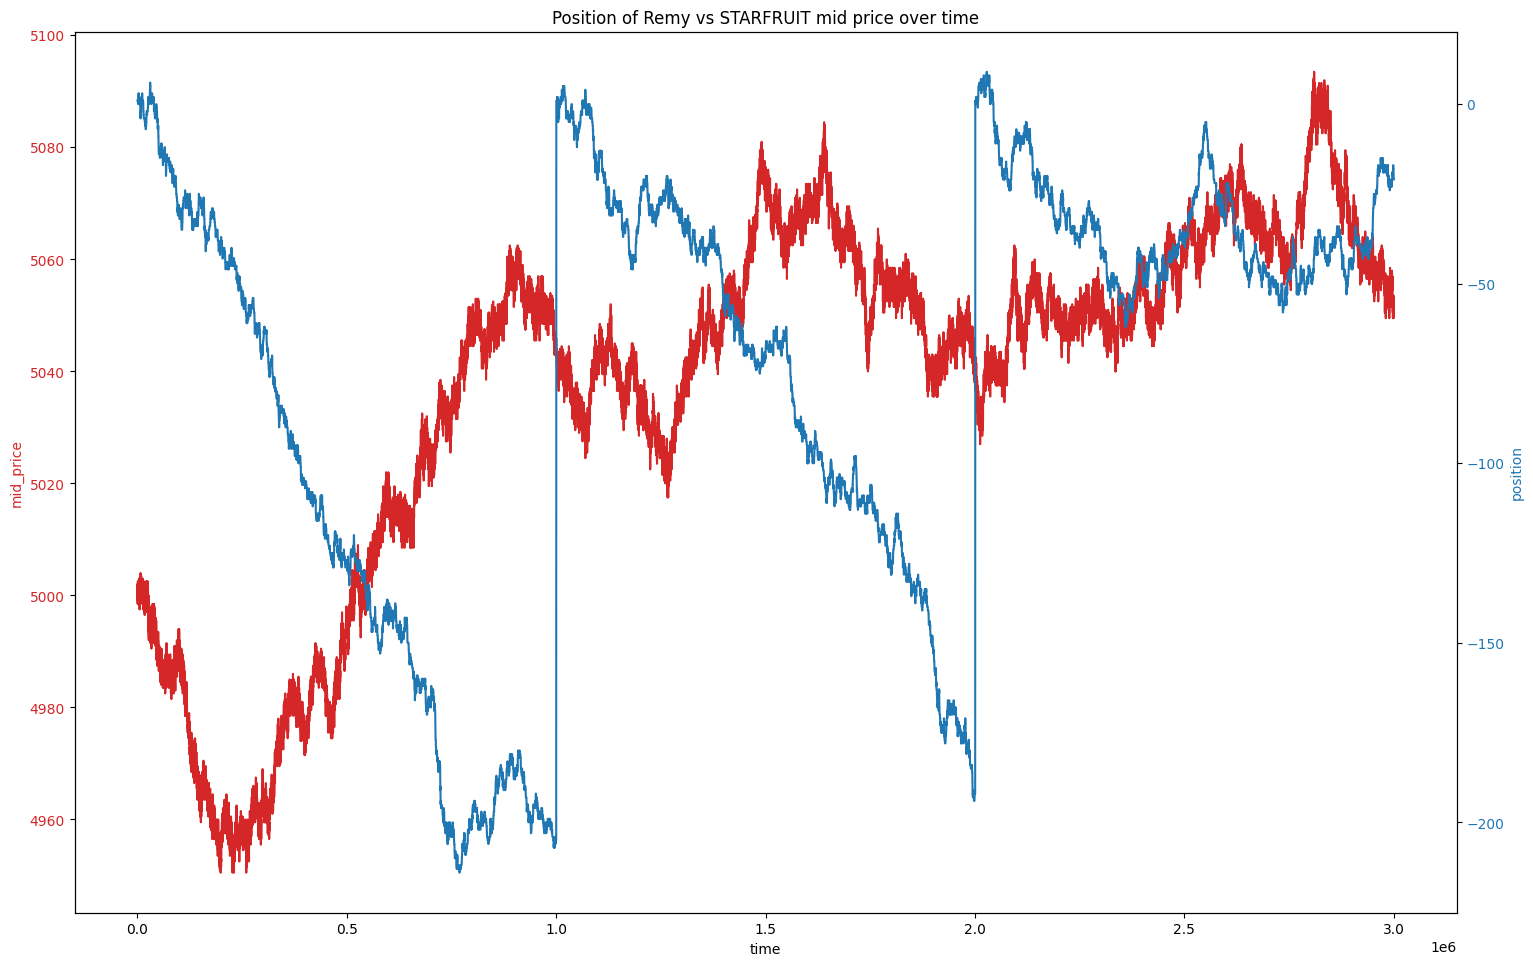

In [46]:
#plot position and price over time wtih right y axis for position
#make figure very wide to see the data better
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time')
ax1.set_ylabel('mid_price', color=color)
ax1.plot(df_trader['timestamp'], df_trader['mid_price'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('position', color=color)
ax2.plot(df_trader['timestamp'], df_trader['position'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
fig.set_size_inches(18.5, 10.5)
#set title
plt.title(f'Position of {TRADER} vs {PRODUCT} mid price over time')
plt.show()